# Imports 

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import networkx as nx

# Pagerank

In [2]:
# reading the dataset

fb = nx.read_edgelist('data.txt', create_using = nx.Graph(), nodetype = int)

In [3]:
print(nx.info(fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


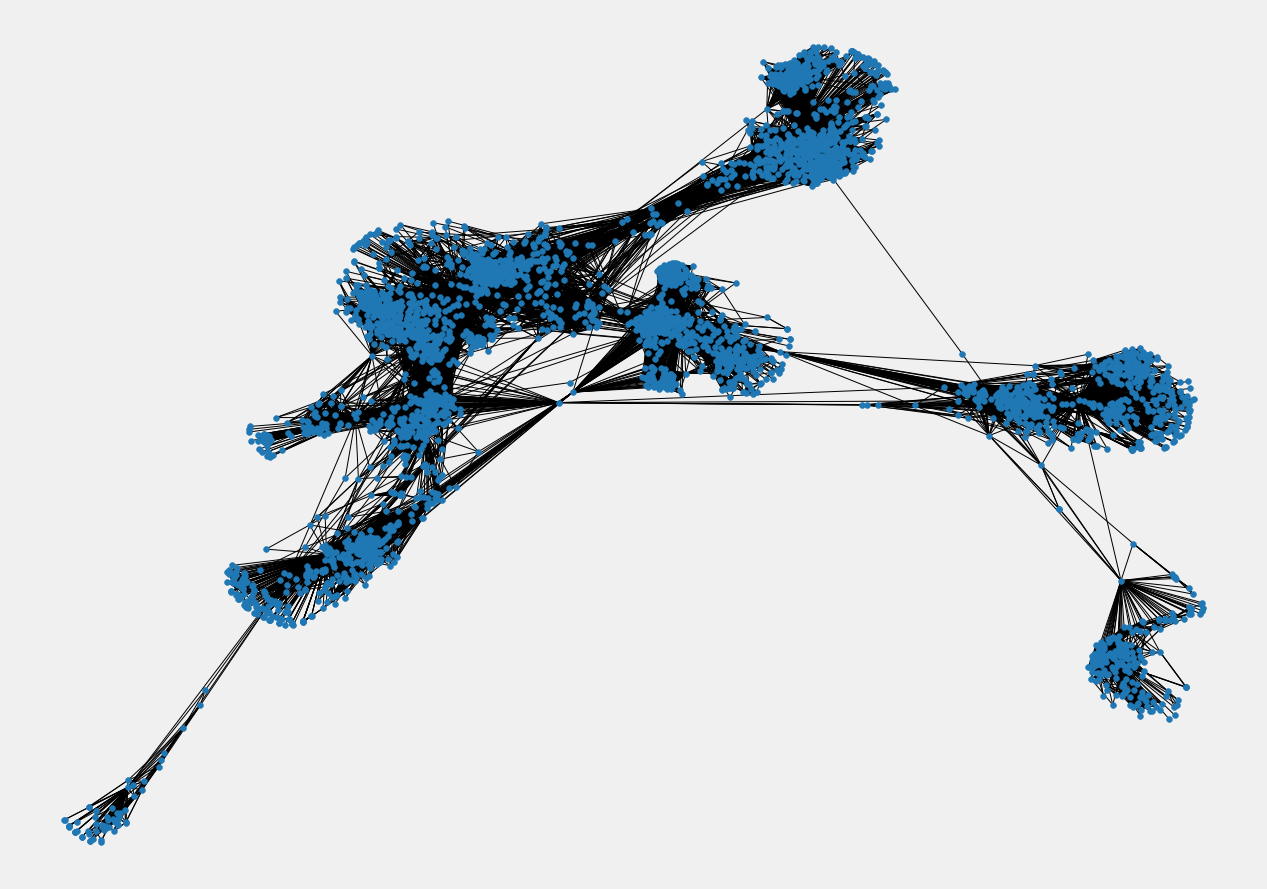

In [4]:
pos = nx.spring_layout(fb)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [5]:
pagerank = nx.pagerank(fb)

In [6]:
import operator
sorted_pagerank = sorted(pagerank.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_pagerank[:5])

[(3437, 0.007614586844749603), (107, 0.006936420955866114), (1684, 0.0063671621383068295), (0, 0.006289602618466542), (1912, 0.0038769716008844974)]


In [7]:
first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))

subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes,)


In [8]:
pos = nx.spring_layout(subgraph_3437)

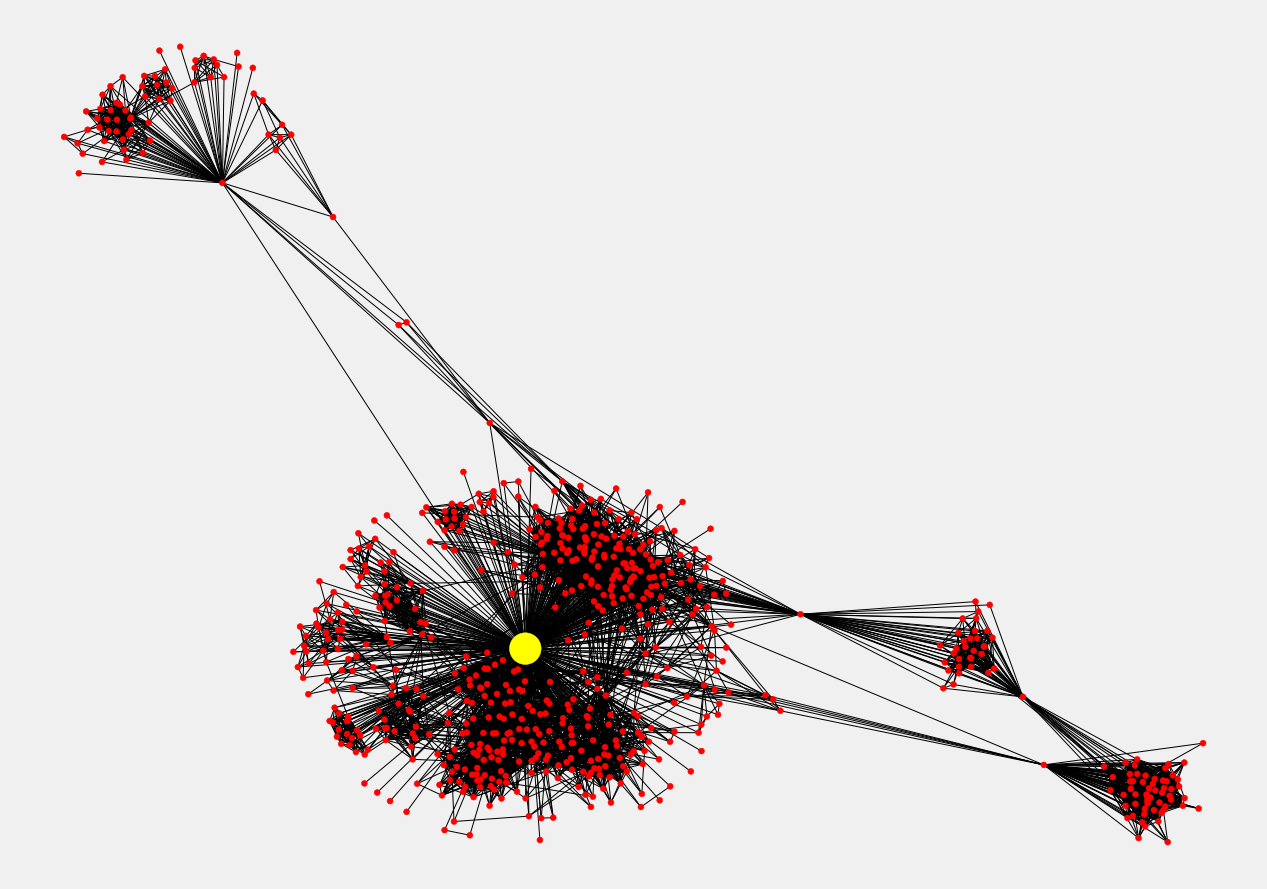

In [9]:
import warnings
warnings.filterwarnings('ignore')
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')

nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

# Centrality

In [10]:
pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)

(-1.0919014453887939,
 0.9299316644668579,
 -0.3236276522278786,
 0.300581069290638)

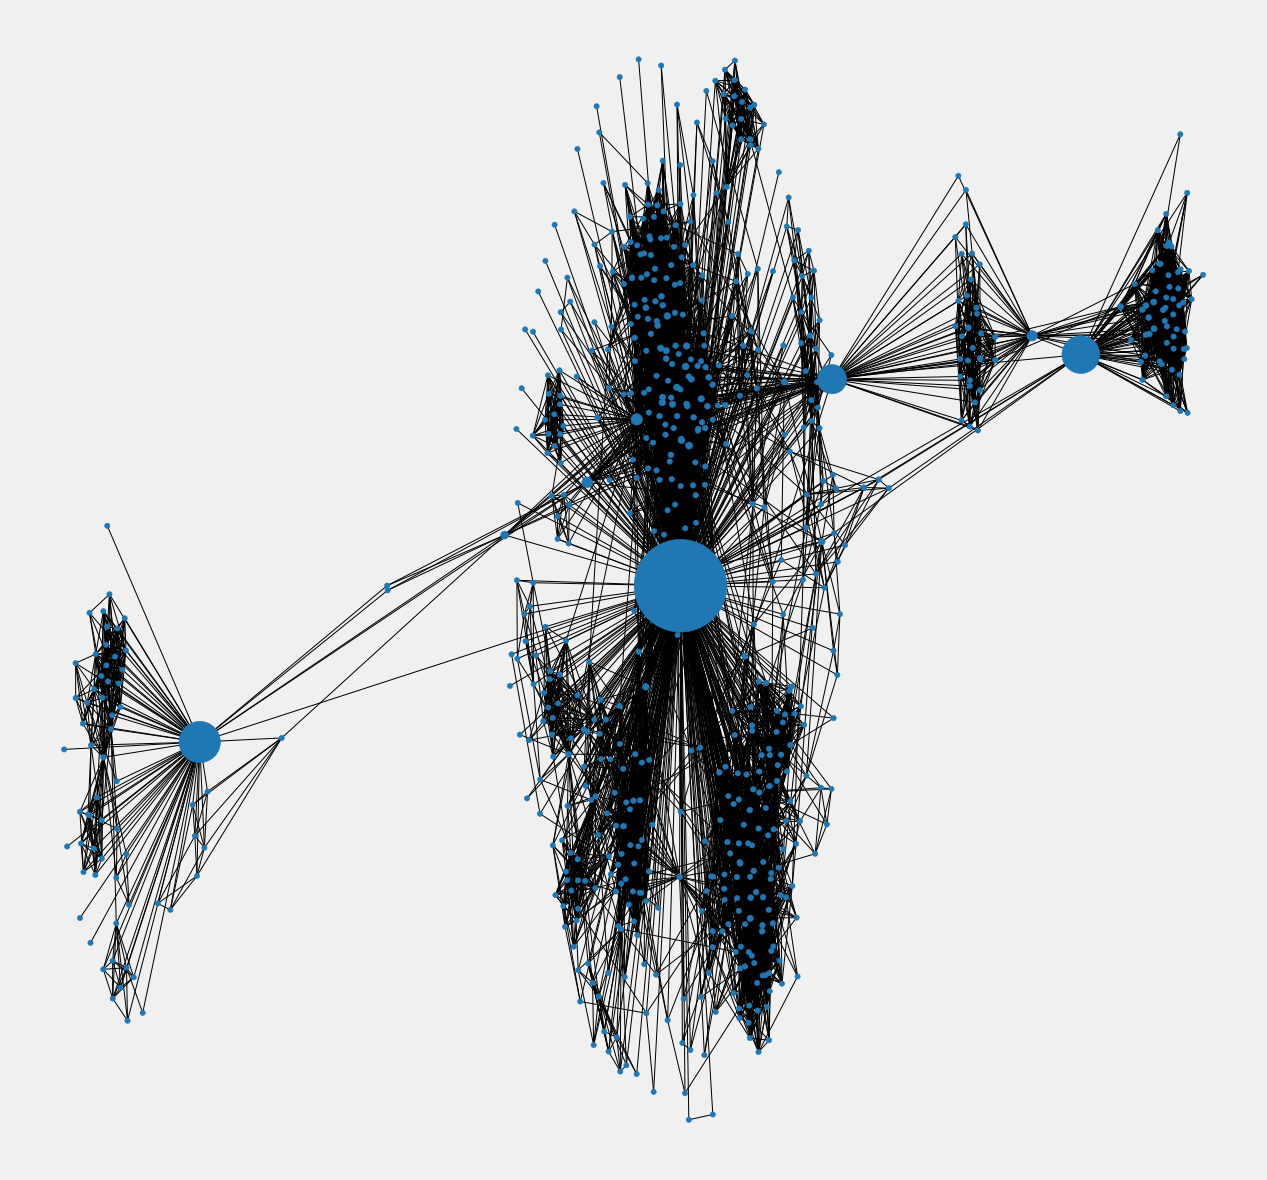

In [11]:
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')